In [24]:
import pandas as pd

df = pd.read_csv('../data/convert_unknown.csv')

In [25]:
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,std_campaign,std_pdays,std_previous,std_empVarRate,std_CPI,std_CCI,std_euribior,std_employed,y_frag,duration_min_30
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,-0.57,0.1,-0.32,0.54,0.73,1.18,0.6,0.13,0,0
1,2,57,services,married,high.school,no,no,no,telephone,may,...,-0.57,0.1,-0.32,0.54,0.73,1.18,0.6,0.13,0,0
2,3,37,services,married,high.school,no,yes,no,telephone,may,...,-0.57,0.1,-0.32,0.54,0.73,1.18,0.6,0.13,0,0
3,4,40,admin.,married,basic.6y,no,no,no,telephone,may,...,-0.57,0.1,-0.32,0.54,0.73,1.18,0.6,0.13,0,0
4,5,56,services,married,high.school,no,no,yes,telephone,may,...,-0.57,0.1,-0.32,0.54,0.73,1.18,0.6,0.13,0,0


In [26]:
#k-means法を使ってみる
#yの値を削除duration_small_30_df = duration_small_30_df
duration_small_30_df = train_df[train_df['duration'] < 30]
duration_small_30_df = duration_small_30_df.drop(['y_frag'],axis=1)
#標準化前のデータを削除
duration_small_30_df = duration_small_30_df.drop(['age'],axis=1)
duration_small_30_df = duration_small_30_df.drop(['duration'],axis=1)
duration_small_30_df = duration_small_30_df.drop(['campaign'],axis=1)
duration_small_30_df = duration_small_30_df.drop(['pdays'],axis=1)
duration_small_30_df = duration_small_30_df.drop(['previous'],axis=1)
duration_small_30_df = duration_small_30_df.drop(['emp.var.rate'],axis=1)
duration_small_30_df = duration_small_30_df.drop(['cons.price.idx'],axis=1)
duration_small_30_df = duration_small_30_df.drop(['cons.conf.idx'],axis=1)
duration_small_30_df = duration_small_30_df.drop(['euribor3m'],axis=1)
duration_small_30_df = duration_small_30_df.drop(['nr.employed'],axis=1)

#ダミー変数化
duration_small_30_df = pd.get_dummies(data=duration_small_30_df,columns=['job','marital','education','default','housing','loan','contact',\
                                                'month','day_of_week','poutcome']) 

duration_small_30_df.head()

,Unnamed: 0,std_age,std_duration,std_campaign,std_pdays,std_previous,std_empVarRate,std_CPI,std_CCI,std_euribior,...,month_nov,month_oct,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
45,46,0.25,-0.90,-0.57,0.1,-0.32,0.54,0.73,1.18,0.6,...,0,0,0,1,0,0,0,0,1,0
84,85,-0.17,-0.90,-0.57,0.1,-0.32,0.54,0.73,1.18,0.6,...,0,0,0,1,0,0,0,0,1,0
105,106,0.35,-0.90,-0.57,0.1,-0.32,0.54,0.73,1.18,0.6,...,0,0,0,1,0,0,0,0,1,0
192,193,0.57,-0.91,-0.23,0.1,-0.32,0.54,0.73,1.18,0.6,...,0,0,0,1,0,0,0,0,1,0
242,243,-0.60,-0.91,-0.57,0.1,-0.32,0.54,0.73,1.18,0.6,...,0,0,0,1,0,0,0,0,1,0


# duration 30秒未満のデータをk-meansにかけてみる 

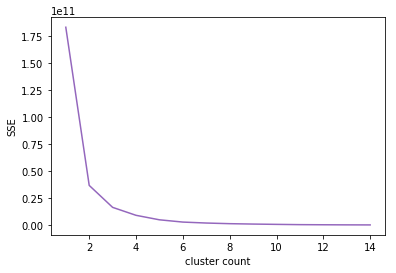

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
cluster_number = 15

cluster_sse = []
for i in range(1,cluster_number):
    km = KMeans(n_clusters = i,random_state=1234)
    km.fit(duration_small_30_df)
    cluster_pred = km.predict(duration_small_30_df)
    centers = km.cluster_centers_
    cluster_sse.append(km.inertia_)
    plt.plot(i, km.inertia_)
#    print(str(i) + "," + str(km.inertia_))

plt.plot(range(1,cluster_number),cluster_sse)
plt.xlabel("cluster count")
plt.ylabel("SSE")
plt.savefig('duration_min_30_SSE.png')
plt.show()




In [28]:
#クラス多数3が最大となっているのでそのときの重心の情報を出力
from statistics import mean, median,variance,stdev

km = KMeans(n_clusters = 3,random_state=1234)
km.fit(duration_small_30_df)
cluster_pred = km.predict(duration_small_30_df)
centers = km.cluster_centers_

#print(km.cluster_centers_)
cluster_df = pd.DataFrame(data=km.cluster_centers_,columns = duration_small_30_df.columns)
cluster_df['age'] = cluster_df['std_age'] *  stdev(train_df['age']) + mean(train_df['age'])
cluster_df['duration'] = cluster_df['std_duration'] *  stdev(train_df['duration']) + mean(train_df['duration'])
cluster_df['campaign'] = cluster_df['std_campaign'] *  stdev(train_df['campaign']) + mean(train_df['campaign'])
cluster_df['pdays'] = cluster_df['std_pdays'] *  stdev(train_df['pdays']) + mean(train_df['pdays'])
cluster_df['previous'] = cluster_df['std_previous'] *  stdev(train_df['previous']) + mean(train_df['previous'])
cluster_df['empVarRate'] = cluster_df['std_empVarRate'] *  stdev(train_df['emp.var.rate']) + mean(train_df['emp.var.rate'])
cluster_df['CPI'] = cluster_df['std_CPI'] *  stdev(train_df['cons.price.idx']) + mean(train_df['cons.price.idx'])
cluster_df['CCI'] = cluster_df['std_CCI'] *  stdev(train_df['cons.conf.idx']) + mean(train_df['cons.conf.idx'])
cluster_df['euribior'] = cluster_df['std_euribior'] *  stdev(train_df['euribor3m']) + mean(train_df['euribor3m'])
cluster_df['employed'] = cluster_df['std_employed'] *  stdev(train_df['nr.employed']) + mean(train_df['nr.employed'])

pd.set_option("display.max_rows", 101)
pd.options.display.precision = 2
cluster_df.T

,0,1,2
Unnamed: 0,8.47e+03,3.25e+04,2.12e+04
std_age,1.05e-01,-2.01e-01,6.17e-02
std_duration,-9.09e-01,-9.20e-01,-9.11e-01
std_campaign,1.59e+00,8.00e-01,2.21e+00
std_pdays,9.79e-02,-1.04e-02,7.14e-02
std_previous,-3.15e-01,4.72e-01,-2.34e-01
std_empVarRate,6.76e-01,-1.40e+00,5.87e-01
std_CPI,1.25e+00,-1.27e+00,3.16e-03
std_CCI,3.06e-01,-1.18e+00,3.53e-01
std_euribior,6.37e-01,-1.50e+00,6.03e-01


In [21]:
print('cluster0:' + str(sum(cluster_pred == 0)))
print('cluster1:' + str(sum(cluster_pred == 1)))
print('cluster2:' + str(sum(cluster_pred == 2)))

cluster0:584
cluster1:571
cluster2:388


# duration>30でy=noのものをk-meansでかけてみる

In [29]:
y_no_df = df[(df['duration'] > 30) & (df['y'] == 'no') ]

y_no_df = y_no_df.drop(['y'],axis=1)
y_no_df = y_no_df.drop(['y_frag'],axis=1)
#標準化前のデータを削除
y_no_df = y_no_df.drop(['age'],axis=1)
y_no_df = y_no_df.drop(['duration'],axis=1)
y_no_df = y_no_df.drop(['campaign'],axis=1)
y_no_df = y_no_df.drop(['pdays'],axis=1)
y_no_df = y_no_df.drop(['previous'],axis=1)
y_no_df = y_no_df.drop(['emp.var.rate'],axis=1)
y_no_df = y_no_df.drop(['cons.price.idx'],axis=1)
y_no_df = y_no_df.drop(['cons.conf.idx'],axis=1)
y_no_df = y_no_df.drop(['euribor3m'],axis=1)
y_no_df = y_no_df.drop(['nr.employed'],axis=1)

#ダミー変数化
y_no_df = pd.get_dummies(data=y_no_df,columns=['job','marital','education','default','housing','loan','contact',\
                                                'month','day_of_week','poutcome']) 

y_no_df.head()
y_no_df

,Unnamed: 0,std_age,std_duration,std_campaign,std_pdays,std_previous,std_empVarRate,std_CPI,std_CCI,std_euribior,...,month_nov,month_oct,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1,1.73,2.32e-02,-0.57,0.10,-0.32,0.54,0.73,1.18,0.60,...,0,0,0,1,0,0,0,0,1,0
1,2,1.83,-4.08e-01,-0.57,0.10,-0.32,0.54,0.73,1.18,0.60,...,0,0,0,1,0,0,0,0,1,0
2,3,-0.28,-1.11e-01,-0.57,0.10,-0.32,0.54,0.73,1.18,0.60,...,0,0,0,1,0,0,0,0,1,0
3,4,0.04,-4.00e-01,-0.57,0.10,-0.32,0.54,0.73,1.18,0.60,...,0,0,0,1,0,0,0,0,1,0
4,5,1.73,2.00e-01,-0.57,0.10,-0.32,0.54,0.73,1.18,0.60,...,0,0,0,1,0,0,0,0,1,0
5,6,0.57,-2.19e-01,-0.57,0.10,-0.32,0.54,0.73,1.18,0.60,...,0,0,0,1,0,0,0,0,1,0
6,7,2.04,-4.46e-01,-0.57,0.10,-0.32,0.54,0.73,1.18,0.60,...,0,0,0,1,0,0,0,0,1,0
7,8,0.14,-1.46e-01,-0.57,0.10,-0.32,0.54,0.73,1.18,0.60,...,0,0,0,1,0,0,0,0,1,0
8,9,-1.65,4.81e-01,-0.57,0.10,-0.32,0.54,0.73,1.18,0.60,...,0,0,0,1,0,0,0,0,1,0
9,10,-1.55,-7.88e-01,-0.57,0.10,-0.32,0.54,0.73,1.18,0.60,...,0,0,0,1,0,0,0,0,1,0


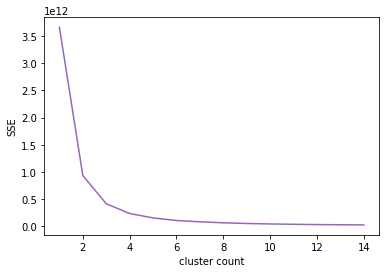

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
cluster_number = 15

cluster_sse = []
for i in range(1,cluster_number):
    km = KMeans(n_clusters = i,random_state=1234)
    km.fit(y_no_df)
    cluster_pred = km.predict(y_no_df)
    centers = km.cluster_centers_
    cluster_sse.append(km.inertia_)
    plt.plot(i, km.inertia_)
#    print(str(i) + "," + str(km.inertia_))

plt.plot(range(1,cluster_number),cluster_sse)
plt.xlabel("cluster count")
plt.ylabel("SSE")
plt.savefig('duration_more_30_SSE.png')
plt.show()

In [32]:
#クラス多数3が最大となっているのでそのときの重心の情報を出力
from statistics import mean, median,variance,stdev

km = KMeans(n_clusters = 3,random_state=1234)
km.fit(y_no_df)
cluster_pred = km.predict(y_no_df)
centers = km.cluster_centers_

#print(km.cluster_centers_)
cluster_df = pd.DataFrame(data=km.cluster_centers_,columns = y_no_df.columns)
cluster_df['age'] = cluster_df['std_age'] *  stdev(train_df['age']) + mean(train_df['age'])
cluster_df['duration'] = cluster_df['std_duration'] *  stdev(train_df['duration']) + mean(train_df['duration'])
cluster_df['campaign'] = cluster_df['std_campaign'] *  stdev(train_df['campaign']) + mean(train_df['campaign'])
cluster_df['pdays'] = cluster_df['std_pdays'] *  stdev(train_df['pdays']) + mean(train_df['pdays'])
cluster_df['previous'] = cluster_df['std_previous'] *  stdev(train_df['previous']) + mean(train_df['previous'])
cluster_df['empVarRate'] = cluster_df['std_empVarRate'] *  stdev(train_df['emp.var.rate']) + mean(train_df['emp.var.rate'])
cluster_df['CPI'] = cluster_df['std_CPI'] *  stdev(train_df['cons.price.idx']) + mean(train_df['cons.price.idx'])
cluster_df['CCI'] = cluster_df['std_CCI'] *  stdev(train_df['cons.conf.idx']) + mean(train_df['cons.conf.idx'])
cluster_df['euribior'] = cluster_df['std_euribior'] *  stdev(train_df['euribor3m']) + mean(train_df['euribor3m'])
cluster_df['employed'] = cluster_df['std_employed'] *  stdev(train_df['nr.employed']) + mean(train_df['nr.employed'])

pd.set_option("display.max_rows", 101)
pd.options.display.precision = 2
cluster_df.T
cluster_df.to_csv("duration_30.csv")

PermissionError: [Errno 13] Permission denied: 'duration_30.csv'

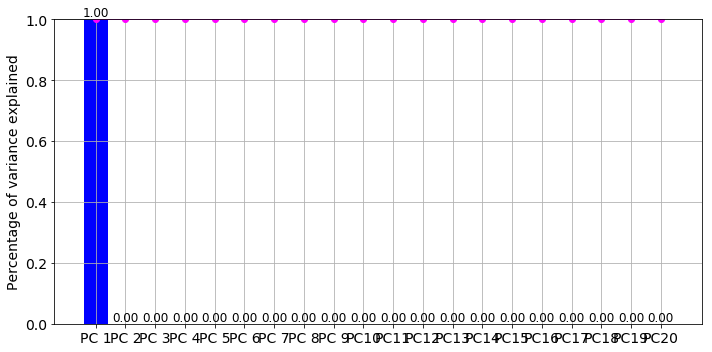

In [10]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca.fit(duration_small_30_df)

x = ['PC%02s' %i for i in range(1, len(pca.explained_variance_ratio_)+1)]
y = pca.explained_variance_ratio_
cum_y = np.cumsum(y)
plt.figure(figsize=(10,5))
plt.bar(x, y, align="center", color="blue")
plt.plot(x, cum_y, color="magenta", marker="o")
for i, j in zip(x, y):
    plt.text(i, j, '%.2f' % j, ha='center', va='bottom', fontsize=12)
plt.ylim([0,1])
plt.ylabel('Percentage of variance explained', fontsize = 14)
plt.tick_params(labelsize = 14)
plt.tight_layout()
plt.grid()
plt.show()

1,183146482074.6952
2,36999436509.14797
3,16705131590.003044
4,9355755043.442982
5,5203034770.89875
6,3107456427.5593967
7,2223863211.955434
8,1630363820.6374438
9,1269433714.579023
10,987448059.0620203
11,736821431.1685277
12,622729860.9046009
13,536134679.19494724
14,484000005.6472728


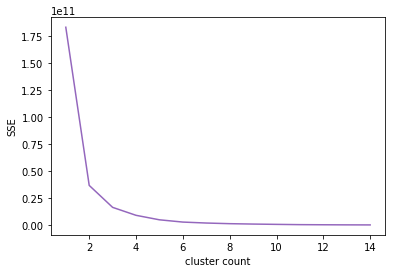

In [11]:
from sklearn.decomposition import PCA

# n_components で削減後の次元数を指定します
X_reduced = PCA(n_components=1, random_state=1234).fit_transform(duration_small_30_df)
X_reduced
cluster_number = 15

cluster_sse = []
for i in range(1,cluster_number):
    km = KMeans(n_clusters = i,random_state=1234)
    km.fit(X_reduced)
    cluster_pred = km.predict(X_reduced)
    centers = km.cluster_centers_
    cluster_sse.append(km.inertia_)
    plt.plot(i, km.inertia_)
    print(str(i) + "," + str(km.inertia_))

plt.plot(range(1,cluster_number),cluster_sse)
plt.xlabel("cluster count")
plt.ylabel("SSE")
plt.show()

In [12]:
import matplotlib.pyplot as plt
cluster_number = 15

cluster_sse = []
for i in range(1,cluster_number):
    km = KMeans(n_clusters = i,random_state=1234)
    km.fit(train_df)
    cluster_pred = km.predict(train_df_sc)
    centers = km.cluster_centers_
    cluster_sse.append(km.inertia_)
    plt.plot(i, km.inertia_)


plt.plot(range(1,cluster_number),cluster_sse)
plt.xlabel("cluster count")
plt.ylabel("SSE")
plt.show()

ValueError: could not convert string to float: 'nonexistent'